<a href="https://colab.research.google.com/github/MariiaYarmolenko/HW-Data-Loves/blob/main/HW_11.1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Підготовка даних


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')

In [5]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [11]:
print(df.shape)
print(df.head(5))

(10886, 19)
                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2011-01-01 04:00:00        75       

1. Датасет містить 10886 рядків та 19 колонок.
2. Рівень деталізації - погодинний.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


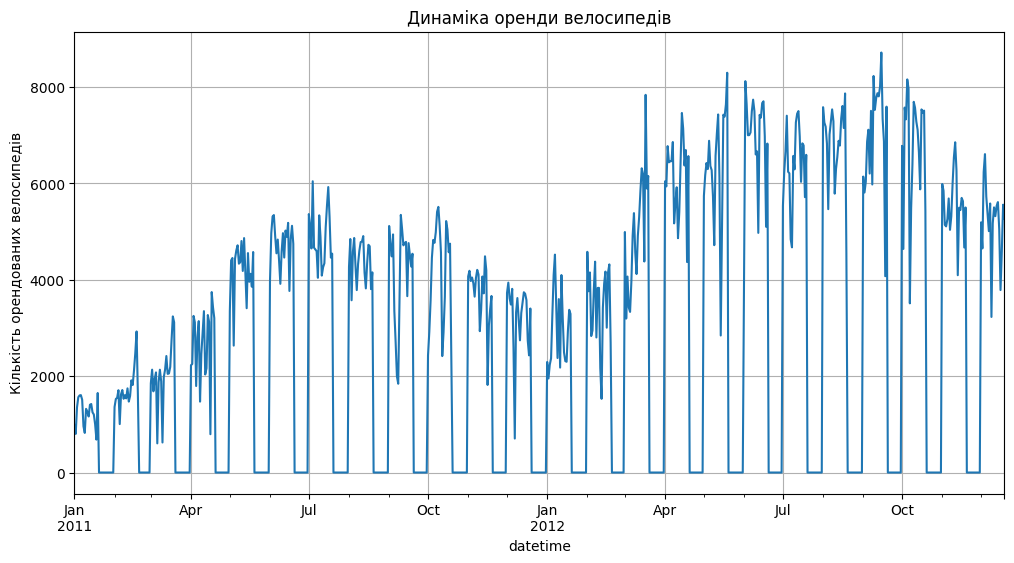

In [9]:
daily_counts = df.resample('D')['count'].sum()

daily_counts.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True
)
plt.ylabel('Кількість орендованих велосипедів')
plt.xlabel=('Дата')
plt.show()

1. Заломи (падіння до 0), найімовірніше, спричинені відсутністю даних за цей часовий період. Варіанти очистки даних:
А) Заповнити пробіли методом інтерполяції (тут також кілька варіантів, яку саме варто вибрати), але, враховуючи, що пробіли в даних за тривалий період, їх заповнення викривить статистичні показники.
Б) Проігнорувати нульові значення і відобразити лише наявні дані.

2. Загальні тенденції - спад попиту у період листопад-квітень та підйом у період травень-жовтень. Другий рік показує висхідний тренд, порівняно з першим, але також у другому році спостерігається більший розрив між "вдалими" та "невдалими" днями, тобто зростання амплітуди коливань.

3. Так, чітко простежується сезонність коливань, що підтверджується вибіркою за два роки.

4. Прослідковуються дещо аномальні провали навіть у літні місяці, що може бути пов'язане з поганими погодними умовами. Високі піки можуть припадати на святкові дні.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

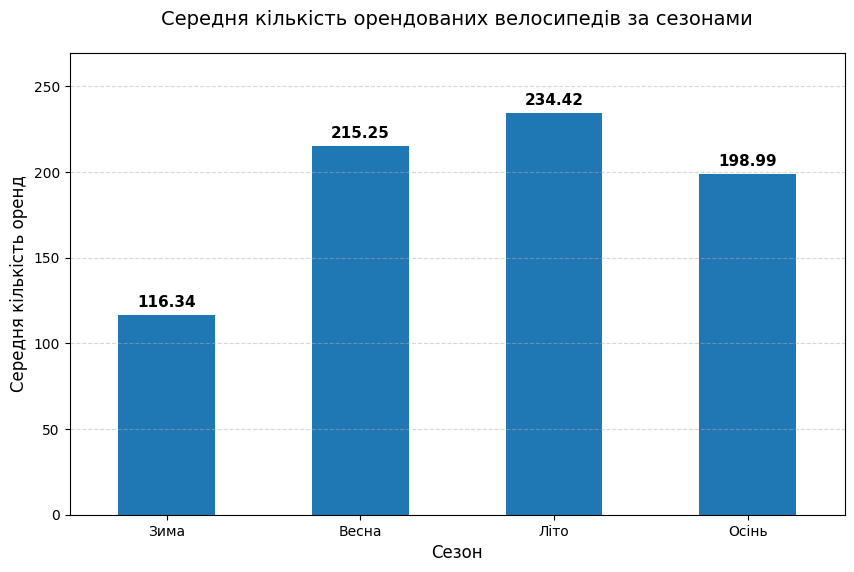

In [23]:
season_names = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
seasonal_avg = df.groupby('season')['count'].mean()
seasonal_avg.index = seasonal_avg.index.map(season_names)

plt.figure(figsize=(10, 6))
ax = seasonal_avg.plot.bar()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.title('Середня кількість орендованих велосипедів за сезонами', fontsize=14, pad=20)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Середня кількість оренд', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, seasonal_avg.max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

1/2 Найбільша кількість оренди припадає на 3 квартал (липень, серпень, вересень), що здається логічним, адже саме в цей сезон найкраща погода, в учбових закладах канікули і люди найчастіше беруть відпустки.
3. У 2 рази відрізняється середня кількість орендованих велосипедів у найменш популярний сезон (зима - 116) та найбільш популярний сезон (літо - 234).

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


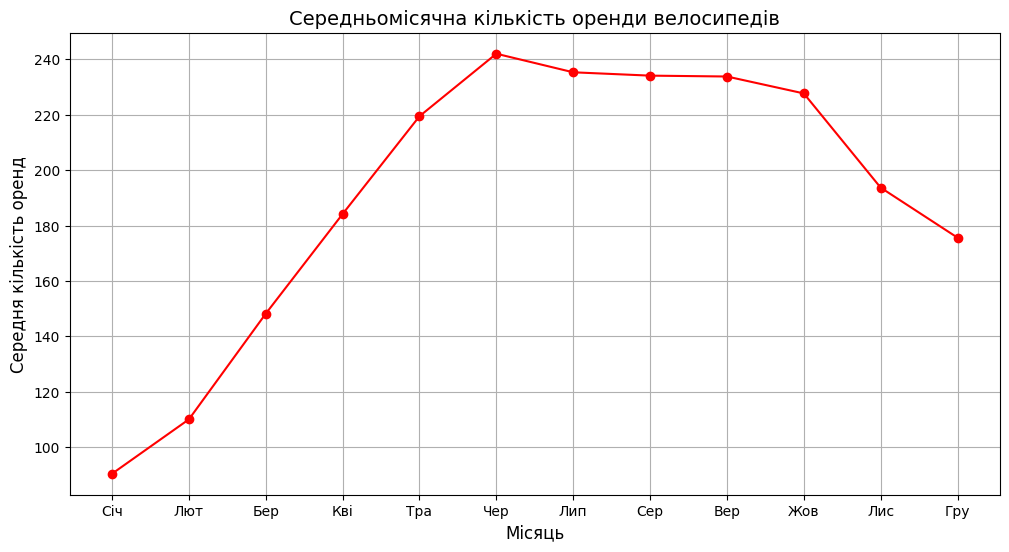

In [35]:
monthly_avg = df.groupby('month')['count'].mean()
monthly_avg.plot(
    figsize=(12, 6),
    marker='o',
    color='Red',
    grid=True,
);

month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.title('Середньомісячна кількість оренди велосипедів', fontsize=14)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Середня кількість оренд', fontsize=12)

plt.show()

1. Найвищий пік припадає на червень, але з травня по жовтень усі місяці мають високі показники. Спад спостерігається з листопада по квітень, а найнижчий показник ми бачимо у січні.

2. Дані відображають таку саму динаміку, яку ми спостерігали до цього.

3. Клімат має ключове значення, адже в країнах з м'яким кламатом можна пересуватися на велосипеда цілорічно. В країнах з суворим кліматом, де зустрічаються низькі або надто високі температури, або часті опади, або сильний вітер, або будь-які інші погодні умови, що не сприяють їзді на велосипеді, бізнес такого формату не працюватиме. В країнах з помірним кліматом можливі коливання протягом року, в залежності від сезону.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

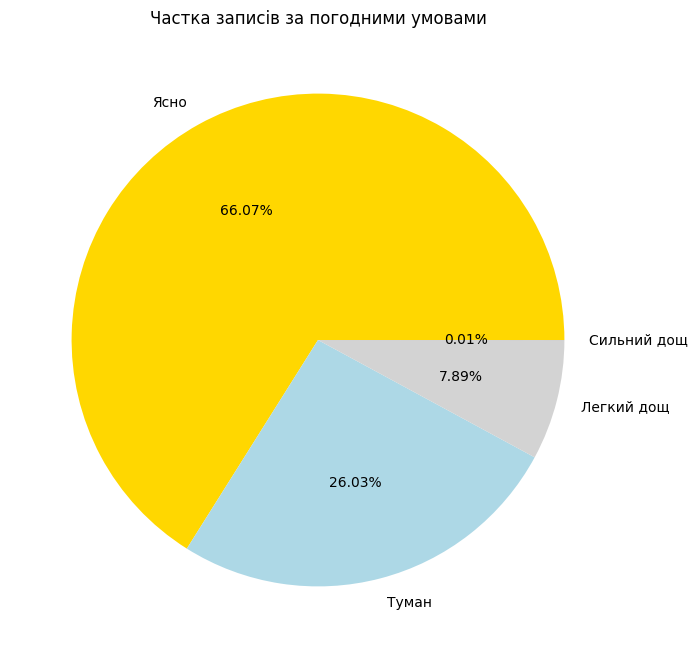

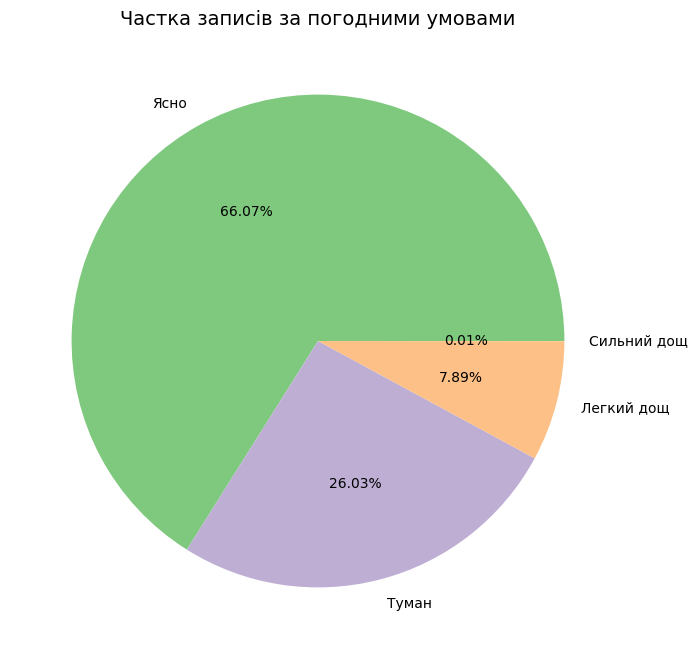

In [53]:
weather_counts = df['weather'].value_counts().sort_index()
weather_names = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

plt.figure(figsize=(12, 8))
plt.pie(
    weather_counts,
    labels=weather_names,
    autopct='%1.2f%%',
    colors=plt.cm.Accent.colors
)

plt.title('Частка записів за погодними умовами', fontsize=14)

plt.show()

1. В датасеті переважає ясна погода.
2. Спостерігаються дні з сильним дощем, але їх частка дуже мала - 0,01%.
3. Погодні умови мають безпосередній вплив на оренду велосипедів, адже це дозвілля під відкритим небом, тож логіка підказує, що незадовільні погодні умови будуть знижувати попит і навпаки, у дні з хорошою погодою попит ростиме.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

<Figure size 1400x1000 with 0 Axes>

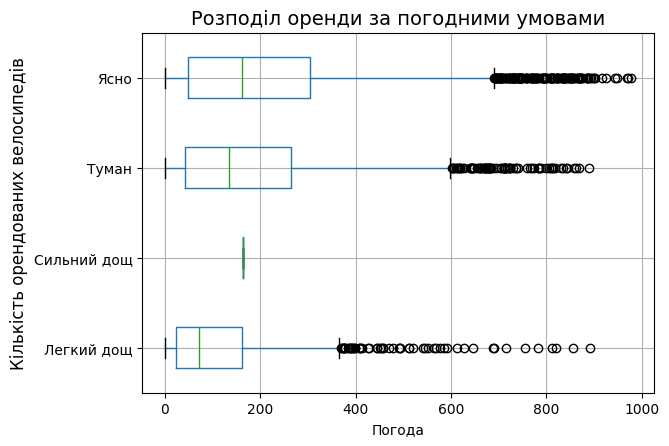

In [67]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_map)

plt.figure(figsize=(14, 10))
df.boxplot(
    column='count',
    by='weather_name',
    vert=False
)

plt.title('Розподіл оренди за погодними умовами', fontsize=14)
plt.suptitle('')
plt.xlabel('Погода')
plt.ylabel('Кількість орендованих велосипедів', fontsize=12)
plt.show()

1.Найбільший розкид ми спостерігаємо за ясної погоди, оскільки ширина "коробки" (міжквартильний розмах) та довжина "вусів" (різниця між мінімальним та максимальним значенням) тут є найбільшими.

2. Викидів багато і вони зустрічаються майже в усіх категоріях (Ясно, Туман, Легкий дощ). Усі викиди спостерігаються на високих показниках.

3. Медіана найвища також за ясної погоди, що є логічним, враховуючи попередні спостереження.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

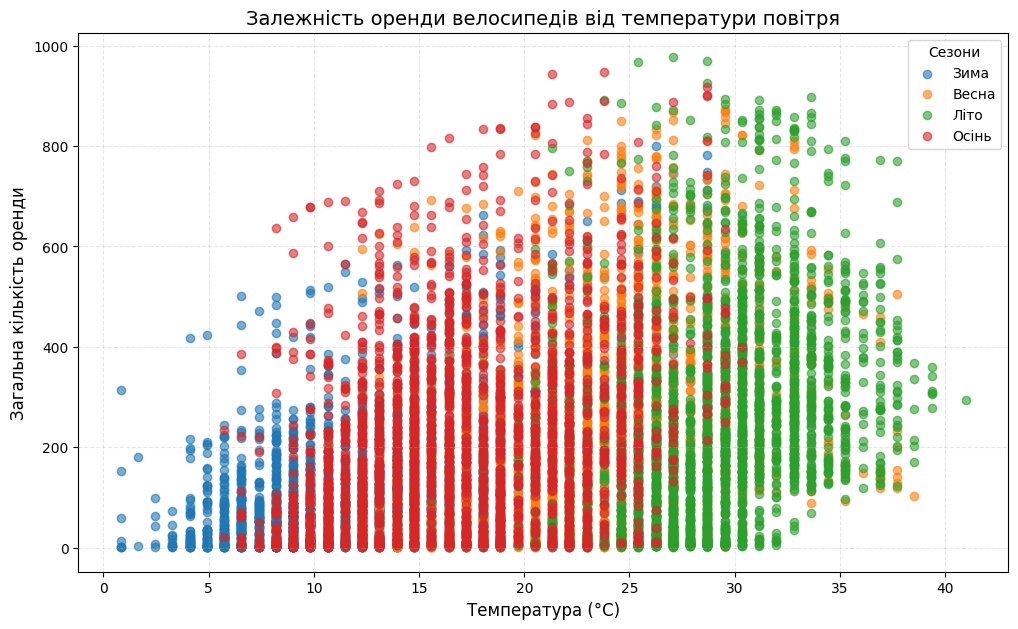

In [74]:
season_desc = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}

plt.figure(figsize=(12, 7))

for season_id in sorted(df['season'].unique()):
    subset = df[df['season'] == season_id]
    plt.scatter(
        subset['temp'],
        subset['count'],
        alpha=0.6,
        label=season_desc[season_id]
    )

plt.title('Залежність оренди велосипедів від температури повітря', fontsize=14)
plt.xlabel('Температура (°C)', fontsize=12)
plt.ylabel('Загальна кількість оренди', fontsize=12)
plt.legend(title="Сезони")
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

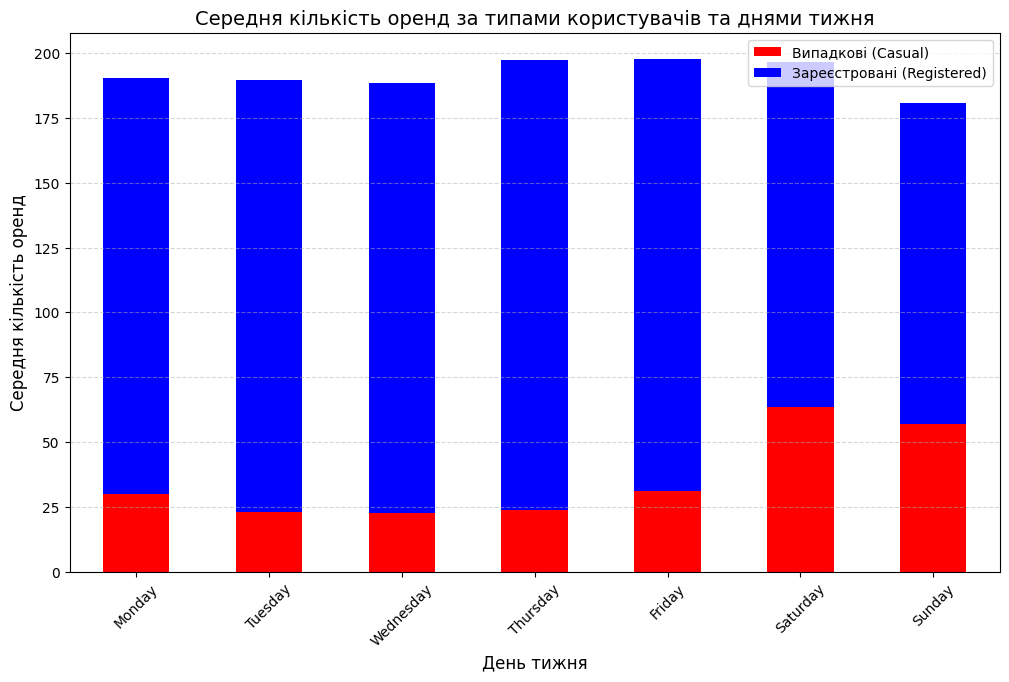

In [73]:
df['day_of_week'] = df.index.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = df.groupby('day_of_week')[['casual', 'registered']].mean().reindex(days_order)

ax = weekly_avg.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['Red', 'Blue']
)

plt.title('Середня кількість оренд за типами користувачів та днями тижня', fontsize=14)
plt.xlabel('День тижня', fontsize=12)
plt.ylabel('Середня кількість оренд', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Випадкові (Casual)', 'Зареєстровані (Registered)'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

1/2 В усі дні тижня зареєстровані користувачі переважають над випадковими. Це можна пояснити тим, що людина, яка планує часто користуватися сервісом, у більшості випадків, зареєструється. Також ми можемо стверджувати, що один і той самий зареєстрований користувач, орендував багатократно, тому міг потрапити у статистику за різні дні. Випадкові користувачі частіше з'являються у вихідні дні, тому можемо припустити, що це рідкісні випадки, пов'язані з відпочинком, на відміну від систематичності, притаманній зареєстрованим користувачам.